### 데이터의 불균형 문제 처리
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확히 분류하는 것이 중요
- 보통 이상 데이터가 target 데이터가 되는 경우가 많다.
- 데이터가 분균형할때는 분류의 성능과 target 데이터를 정확히 분류해내는 목표가 일치하지 않게 된다.
- 이러한 경우 분석 결과의 해석 뿐만이 아니라 머신러닝 등 모델링에서 문제가 발생할 수 있다.
- 소수의 데이터인 target의 중요도를 낮게 판단하게 되므로, 궁극적으로 분석 가능한 모델을 생성할 수 없다.
- 이러한 문제를 해결하기 위해 소수의 비정상 데이터를 늘리는 오버 샘플링,
- 상대적으로 많은 데이터에서 일부만 사용하는 언더 샘플링 존재.

In [1]:
# 라이브러리 설치
# pip install imbalanced-learn

#### 언더 샘플링
- 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터 세트가 가진 라벨의 수준으로 감소시키는 방법
- 이 기법은 데이터 불균형 문제는 해결, but 전체 데이터의 개수가 줄어들어 데이터의 손실이 일어나고,
- 학습 성능이 떨어질 수 있다.

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# 랜덤 데이터셋 생성
# 90:10의 비율로 생성

x, y = make_classification( # 가상의 데이터셋을 만드려는 함수
    n_samples=2000,         # 총 데이터의 수
    n_features=5,           # 총 컬럼의 수
    weights=[0.9],          # 정상과 이상 데이터의 비율
    flip_y=0                #
)

In [4]:
Counter(y)

Counter({np.int64(0): 1801, np.int64(1): 199})

In [5]:
# 랜덤 언더 샘플링
# 다수의 데이터를 소수의 데이터의 개수만큼 줄어주는 작업

#클래스 생성
undersampler = RandomUnderSampler()

x_under, y_under = undersampler.fit_resample(x, y)

In [6]:
# 1602개의 데이터 손실
Counter(y_under)

Counter({np.int64(0): 199, np.int64(1): 199})

In [7]:
# 위에서는 동일한 데이터 수로 진행했음.
# 하지만 원하는 비율이 있을 때는 ?

# sampling_strategy 매개변수 :
# 소수의 데이터의 비율을 지정하여 다수의 데이터의 개수를 정한다.
undersampler2 = RandomUnderSampler(sampling_strategy=0.3)
x_under_2, y_under_2 = undersampler2.fit_resample(x, y)

In [8]:
Counter(y_under_2)

Counter({np.int64(0): 663, np.int64(1): 199})

#### 오버 샘플링
- 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜 학습에 사용하기 위한 방법
- 데이터의 손실이 없기 때문에 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용

In [9]:
# 랜덤 오버 샘플링

# 소수의 데이터를 단순 복제하여 다수의 데이터의 개수와 비율을 맞춰주는 방법
# 데이터를 단순하게 복제하기 때문에 분포가 변하지 않는다.
# 단 수가 증가하기 때문에 가중치가 발생할 수 있다.
# 오버피팅의 위험성은 존재하지만, 불균형 문제를 처리하지 않았을 때 위험보다는 유효하다.
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

In [10]:
# 기존에 191개였던 y데이터
x_over, y_over = oversample.fit_resample(x, y)
Counter(y_over)

Counter({np.int64(0): 1801, np.int64(1): 1801})

In [11]:
oversample2 = RandomOverSampler(sampling_strategy=0.5)
x_over_2, y_over_2 = oversample2.fit_resample(x, y)
Counter(y_over_2)

Counter({np.int64(0): 1801, np.int64(1): 900})

In [12]:
# SMOTE(Synthetic Minority Over-sampling Technique)

# 소수의 데이터의 관측 값에 대한 k개의 최근접 이웃을 찾고 
# 관측 값과 이웃으로 선택된 값 사이에 읨의의 새로운 데이터를 생성하는 방법
from imblearn.over_sampling import SMOTE

In [13]:
smote_sample = SMOTE()

In [14]:
x_sm, y_sm = smote_sample.fit_resample(x,y)

In [15]:
Counter(y_sm)

Counter({np.int64(0): 1801, np.int64(1): 1801})

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

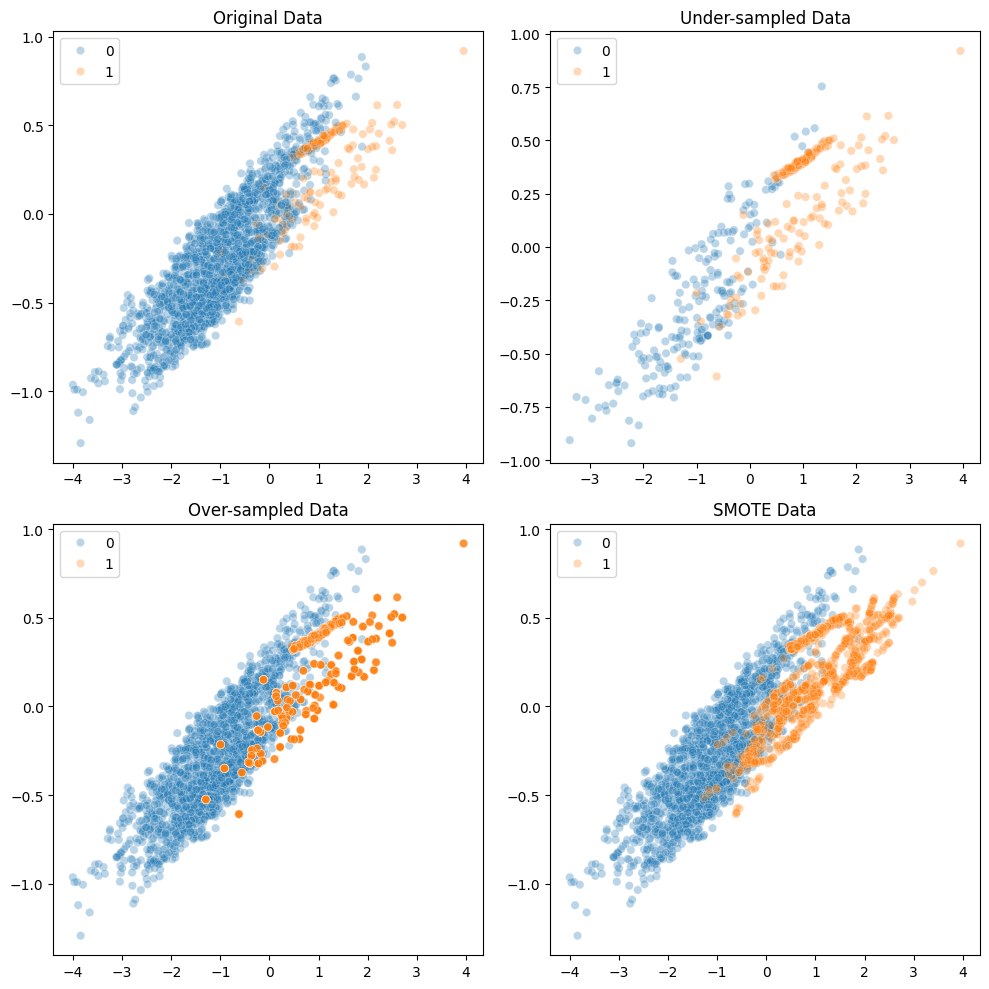

In [18]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# 산점도 4개 생성
sns.scatterplot(x=x[:, 1], y=x[:, 2], ax=axes[0][0], hue=y, alpha=0.3)
sns.scatterplot(x=x_under[:, 1], y=x_under[:, 2], ax=axes[0][1], hue=y_under, alpha=0.3)
sns.scatterplot(x=x_over[:, 1], y=x_over[:, 2], ax=axes[1][0], hue=y_over, alpha=0.3)
sns.scatterplot(x=x_sm[:, 1], y=x_sm[:, 2], ax=axes[1][1], hue=y_sm, alpha=0.3)

# 각 제목 설정
axes[0][0].set_title('Original Data')
axes[0][1].set_title('Under-sampled Data')
axes[1][0].set_title('Over-sampled Data')
axes[1][1].set_title('SMOTE Data')

plt.tight_layout()
plt.show()
